# Fraud Detection: Model Evaluation

In this notebook we will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score,accuracy_score, precision_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression    
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

### Instances of fraud
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
def instances_of_fraud():
    
    df = pd.read_csv('fraud_data.csv')
    fraund = len(df[df['Class'] == 1])
    
    return fraund/len(df)
instances_of_fraud()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following parts

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Dummy Classifier

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [7]:
def score_dummy():
    
    dum = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    recall = recall_score(y_test,dum.predict(X_test))
    score = accuracy_score(dum.predict(X_test),y_test)
    
    return score,recall
score_dummy()

(0.9852507374631269, 0.0)

### SVC Classifier: Precision Recall

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [20]:
def score_svc():

    svm = SVC().fit(X_train,y_train)
    score = svm.score(X_test,y_test)
    recall = recall_score(y_test,svm.predict(X_test))
    pres = precision_score(y_test,svm.predict(X_test))

    return score,recall,pres
score_svc()

(0.9900442477876106, 0.35, 0.9333333333333333)

### SVC Classifier: Confusion Matrix

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [21]:
def confusion_matrix_svc():

    svm = SVC(C=1e9,gamma=1e-07).fit(X_train,y_train)
    y_pred = svm.decision_function(X_test) >-220
    
    return confusion_matrix(y_test,y_pred)
confusion_matrix_svc()

array([[5320,   24],
       [  14,   66]])

### Logistic Regression: Precision Recall Curve

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [22]:
def precision_recall_curve_75():
    
    lr = LogisticRegression().fit(X_train, y_train)
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = np.argmin(np.abs(precision-0.75))
    closest_zero_r = recall[closest_zero_p]
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]
    
    return closest_zero_r, closest_zero_tpr_lr
precision_recall_curve_75()

/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

(0.825, 0.9875)

### Logistic Regression: Grid Search CV

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [24]:
def grid_search():
    
    lr = LogisticRegression()

    grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

    # default metric to optimize over grid parameters
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr.fit(X_train, y_train)
 
    return np.array(grid_lr.cv_results_['mean_test_score'])
grid_search()

/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([       nan, 0.79701299,        nan, 0.80428571,        nan,
       0.81519481,        nan, 0.81149351,        nan, 0.80785714])

/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/u.razzaq/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

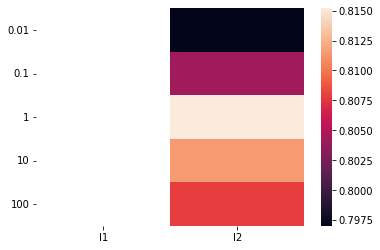

In [25]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0)

GridSearch_Heatmap(grid_search())